# 주어진 시계열 데이터에서 이상치 탐지 및 처리 실습 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

#### 시계열 데이터 생성, 이상치 추가, 데이터 프레임 생성

In [2]:
# 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10 

# 이상치 추가 
values[15] = 70

# 데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)
print(data['Value'].iloc[15])

         Date      Value
0  2023-01-01   5.191487
1  2023-01-02  -6.715835
2  2023-01-03 -19.004497
3  2023-01-04  -4.625544
4  2023-01-05 -17.918789
..        ...        ...
95 2023-04-06 -11.689045
96 2023-04-07  19.482930
97 2023-04-08  -2.629411
98 2023-04-09 -12.218977
99 2023-04-10   5.226097

[100 rows x 2 columns]
70.0


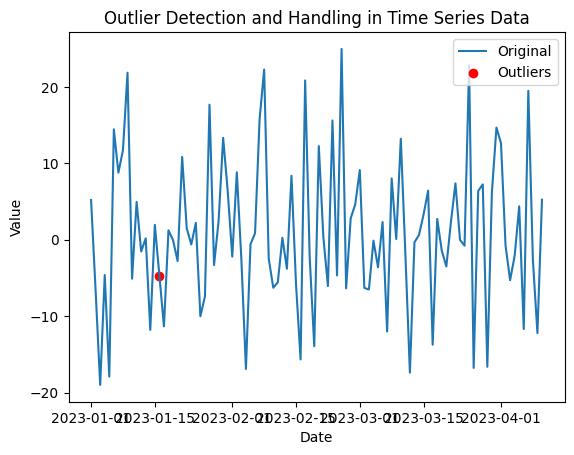

이상치 처리된 데이터 확인 >>  -4.6982092566653275


In [3]:
# 이상치 탐지 
z_scores = np.abs(stats.zscore(data['Value'])) 

# 임계치 설정 
thredhold = 3 

# z-scores 임계값 초과하는 체크 
outliers = z_scores > thredhold

# 이상치를 -> 결측치로 처리 
data.loc[outliers, 'Value'] = np.nan

# 결측치 보간
data['Value'] = data['Value'].interpolate()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection and Handling in Time Series Data')
plt.legend()
plt.show()

# 처리된 데이터 확인
print("이상치 처리된 데이터 확인 >> " , data['Value'].iloc[15])

#### 시각화 코드 